# Plotting and Visualization

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

In [3]:
%pwd

'/Users/1001235/MyDev/ws_study/pydata-book'

In [ ]:
%cd ../book_scripts/

## A brief matplotlib API primer

In [7]:
import matplotlib.pyplot as plt

### Figures and Subplots

In [3]:
fig = plt.figure()

In [4]:
plt.gcf()

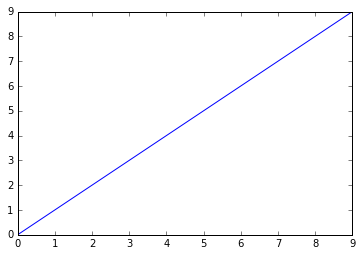

In [5]:
plt.plot(np.arange(10))

In [6]:
ax1 = fig.add_subplot(2, 2, 1)

In [7]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [8]:
fig.show(ax1)

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


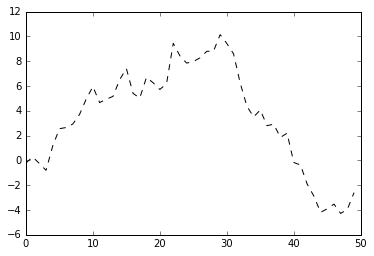

In [9]:
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')

In [10]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [11]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d4a5c88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d773f60>]], dtype=object)

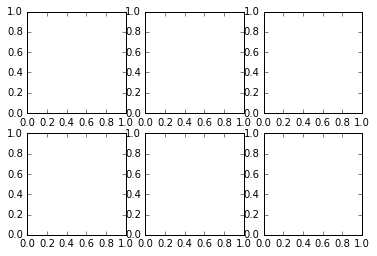

In [12]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots

In [13]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

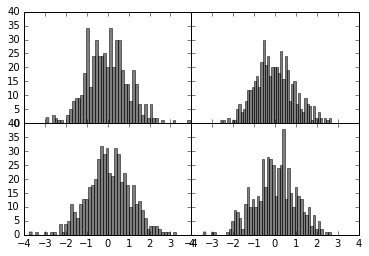

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, markers, and line styles

In [15]:
plt.figure()

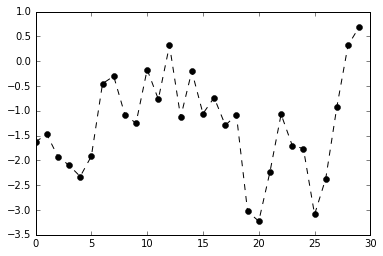

In [16]:
plt.plot(randn(30).cumsum(), 'ko--')

In [17]:
plt.close('all')

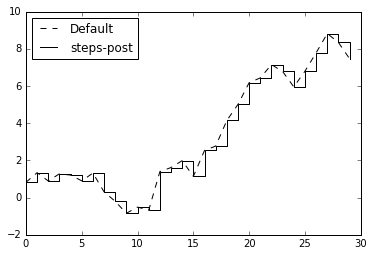

In [18]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, labels, and legends

#### Setting the title, axis labels, ticks, and ticklabels

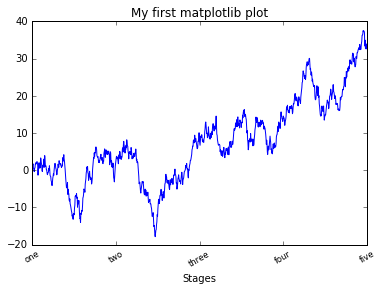

In [19]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### Adding legends

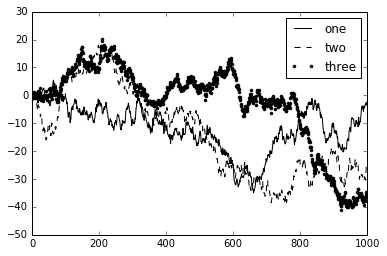

In [20]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

### Annotations and drawing on a subplot

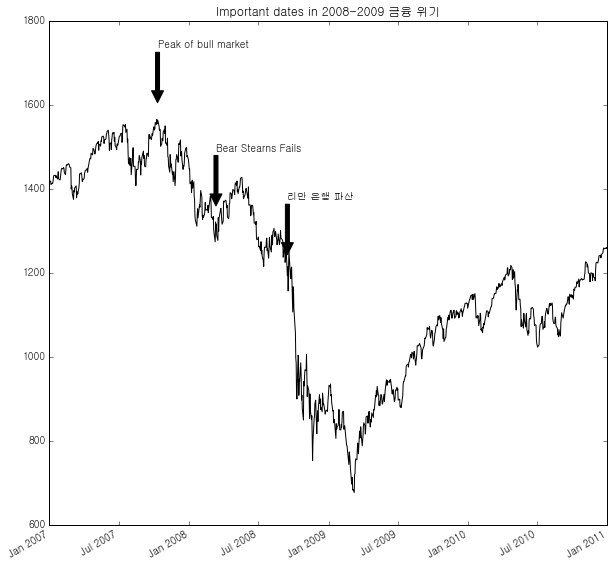

In [38]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), '리만 은행 파산')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 금융 위기')

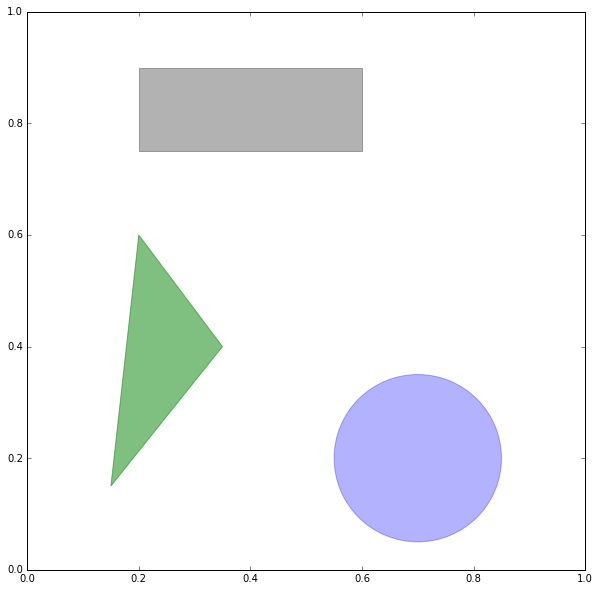

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving plots to file

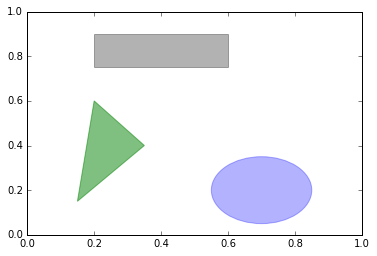

In [31]:
fig

In [26]:
fig.savefig('figpath.svg')

In [27]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [29]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib configuration

In [46]:
plt.rc('figure', figsize=(10, 5))

In [36]:
font_options = {'family' : "gulim", 'weight' : 'normal', 'size' : 10}
plt.rc('font', **font_options)

In [39]:
import matplotlib
matplotlib.font_manager.get_fontconfig_fonts()

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


{}

## Plotting functions in pandas

### Line plots

In [48]:
plt.close('all')

In [41]:
plt

<module 'matplotlib.pyplot' from '//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [43]:
lst = np.random.randn(10)
lst

array([-0.3006, -0.0481,  1.6327, -0.2202,  0.1034, -0.9553,  1.3074,
        1.4333,  1.7669,  1.0392])

In [44]:
lst.cumsum()

array([-0.3006, -0.3487,  1.284 ,  1.0637,  1.1671,  0.2118,  1.5192,
        2.9525,  4.7194,  5.7585])

In [49]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0     1.430405
10    0.634236
20   -0.446297
30    0.833262
40    1.605364
50    2.332683
60    2.315034
70    3.138703
80    4.173249
90    4.330447
dtype: float64

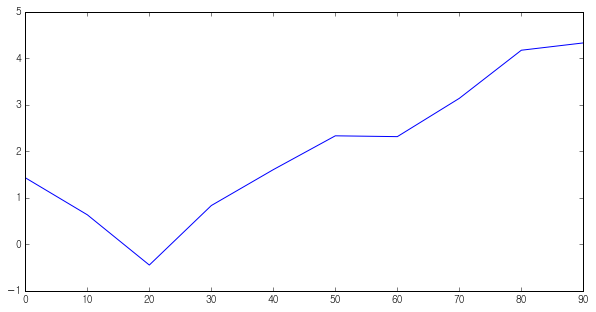

In [50]:
s.plot()

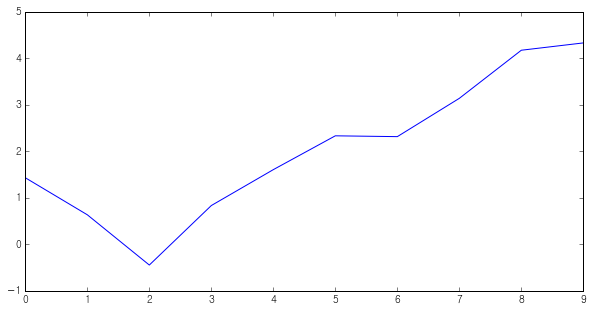

In [51]:
s.plot(use_index=False)

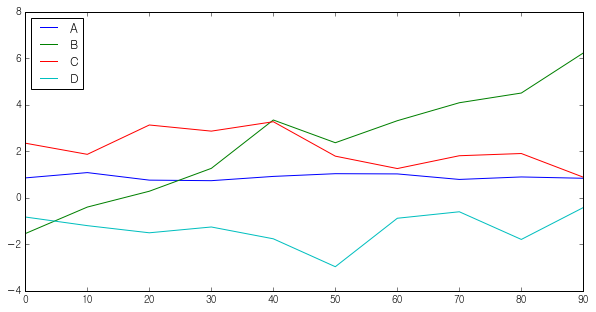

In [59]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x123298a20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12349aba8>], dtype=object)

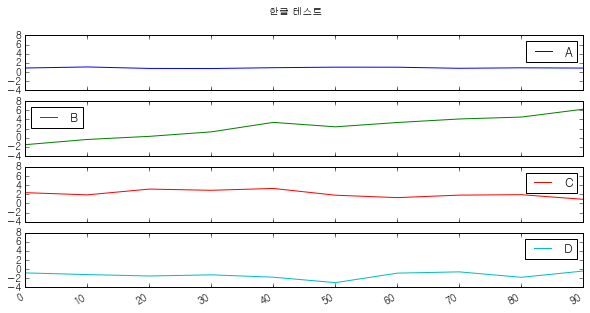

In [63]:
df.plot(subplots=True, sharey=True, title='한글 테스트')

In [53]:
df

,A,B,C,D
0,0.744019,1.741426,-2.214074,-3.140963
10,-0.765957,1.351609,-2.487327,-3.108317
20,0.410331,0.062899,-2.979006,-1.403576
30,-0.422643,-0.417773,-4.380184,-2.186196
40,-0.254424,1.229691,-5.414565,-0.796791
50,1.286453,0.140959,-3.170207,-1.240957
60,2.218140,1.509640,-3.034504,-1.901456
70,3.227852,3.258235,-2.872855,-1.194800
80,2.800936,3.157084,-4.073967,-0.959945
90,3.013016,3.111291,-3.175906,-1.071050


In [55]:
d = np.random.randn(10,4)
d

array([[ 0.424 , -0.0097, -0.7866,  0.0068],
       [-0.479 , -1.3708, -0.2061,  0.4457],
       [-0.1916,  1.154 , -1.3884, -0.0029],
       [-1.2333,  0.8412,  0.1235,  1.2759],
       [-0.0664, -1.2347, -0.7626, -0.3259],
       [-0.1114,  0.3798,  1.4301, -0.4534],
       [-0.3382,  1.9795, -0.4749,  1.3962],
       [-1.8849,  0.0803, -0.04  , -0.5338],
       [ 0.353 ,  0.7152, -0.7677, -0.6644],
       [-0.0507,  1.1039,  0.268 ,  0.8659]])

In [56]:
d.cumsum()

array([ 0.424 ,  0.4143, -0.3723, -0.3655, -0.8445, -2.2153, -2.4214,
       -1.9757, -2.1673, -1.0133, -2.4017, -2.4046, -3.638 , -2.7967,
       -2.6732, -1.3974, -1.4638, -2.6984, -3.461 , -3.787 , -3.8984,
       -3.5185, -2.0884, -2.5418, -2.88  , -0.9005, -1.3754,  0.0208,
       -1.8641, -1.7838, -1.8238, -2.3576, -2.0047, -1.2894, -2.0572,
       -2.7215, -2.7722, -1.6684, -1.4003, -0.5344])

In [57]:
d.cumsum(0)

array([[ 0.424 , -0.0097, -0.7866,  0.0068],
       [-0.055 , -1.3805, -0.9927,  0.4525],
       [-0.2466, -0.2266, -2.3811,  0.4496],
       [-1.4799,  0.6147, -2.2576,  1.7255],
       [-1.5464, -0.62  , -3.0202,  1.3996],
       [-1.6578, -0.2402, -1.59  ,  0.9462],
       [-1.9959,  1.7393, -2.065 ,  2.3424],
       [-3.8809,  1.8196, -2.1049,  1.8086],
       [-3.5279,  2.5348, -2.8727,  1.1442],
       [-3.5786,  3.6387, -2.6046,  2.0101]])

In [58]:
d.cumsum(1)

array([[ 0.424 ,  0.4143, -0.3723, -0.3655],
       [-0.479 , -1.8498, -2.0559, -1.6102],
       [-0.1916,  0.9624, -0.426 , -0.4289],
       [-1.2333, -0.3921, -0.2686,  1.0073],
       [-0.0664, -1.3011, -2.0637, -2.3896],
       [-0.1114,  0.2684,  1.6986,  1.2452],
       [-0.3382,  1.6413,  1.1664,  2.5626],
       [-1.8849, -1.8046, -1.8446, -2.3784],
       [ 0.353 ,  1.0682,  0.3004, -0.3639],
       [-0.0507,  1.0532,  1.3212,  2.1871]])

### Bar plots

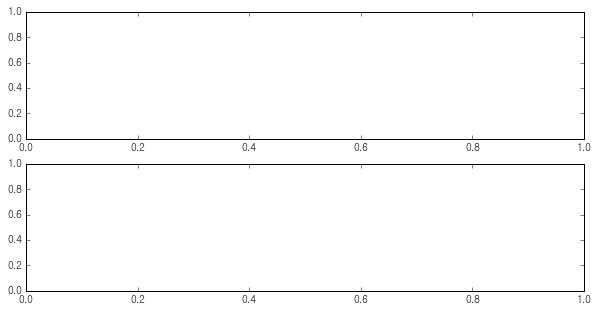

In [64]:
fig, axes = plt.subplots(2, 1)

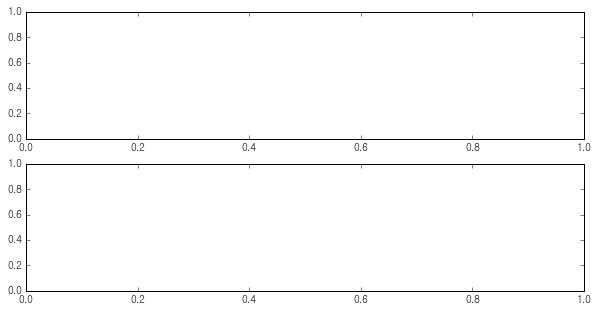

In [65]:
fig

In [66]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1236a9e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1236f0ac8>], dtype=object)

In [67]:
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [68]:
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)

In [69]:
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

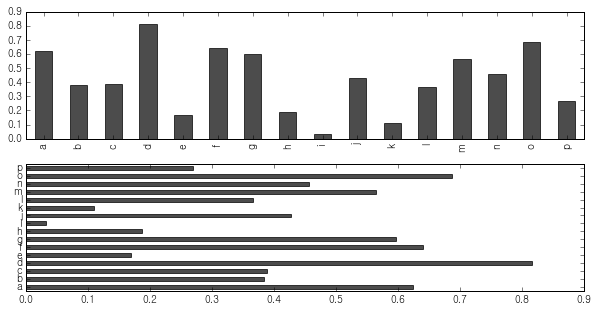

In [70]:
fig

In [71]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.427505,0.270017,0.621603,0.517803
two,0.524254,0.122999,0.268186,0.390744
three,0.820411,0.106120,0.669371,0.659529
four,0.103074,0.113413,0.104452,0.862967
five,0.831630,0.231368,0.306697,0.160390
six,0.432890,0.148426,0.112044,0.978999


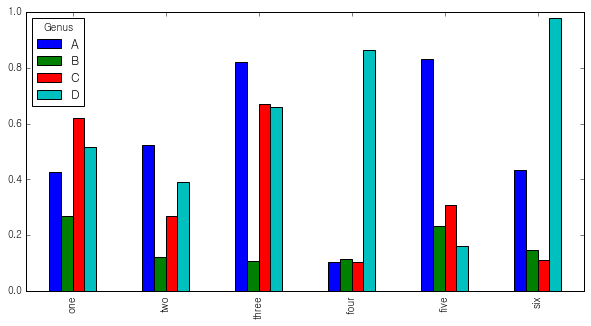

In [74]:
df.plot(kind='bar')

In [73]:
plt.figure()

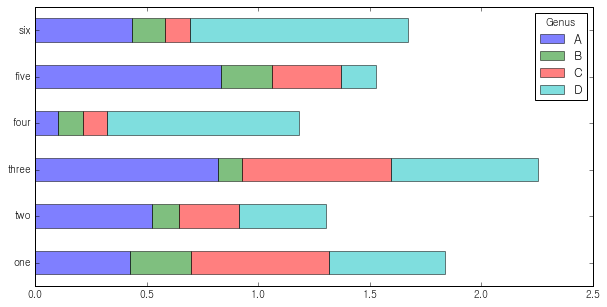

In [75]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [78]:
tips = pd.read_csv('ch08/tips.csv')
tips[:10]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [111]:
tips = tips.rename(columns={'size':'Size'})

In [112]:
tips[:10]

,total_bill,tip,sex,smoker,day,time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [97]:
tips.size.unique()

AttributeError: 'numpy.int64' object has no attribute 'unique'

In [113]:
party_counts = pd.crosstab(tips.day, tips.Size)
party_counts

Size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [114]:
# Not many 1- and 6-person parties
party_counts = party_counts.ix[:, 2:5]
party_counts

Size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [115]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

Size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


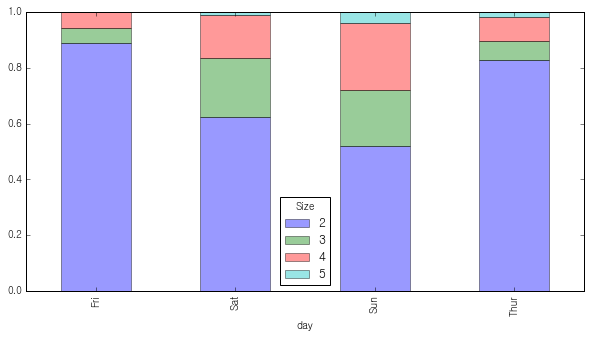

In [120]:
party_pcts.plot(kind='bar', stacked=True, alpha=0.4)

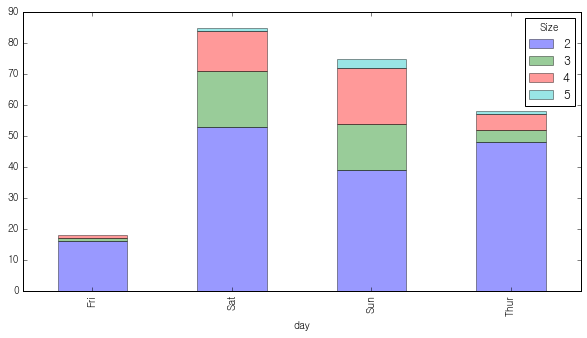

In [121]:
party_counts.plot(kind='bar', stacked=True, alpha=0.4)

### Histograms and density plots

In [122]:
plt.figure()

In [124]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:10]

,total_bill,tip,sex,smoker,day,time,Size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
7,26.88,3.12,Male,No,Sun,Dinner,4,0.116071
8,15.04,1.96,Male,No,Sun,Dinner,2,0.130319
9,14.78,3.23,Male,No,Sun,Dinner,2,0.218539


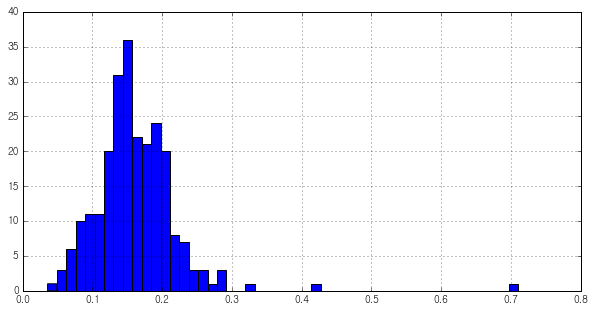

In [127]:
tips['tip_pct'].hist(bins=50)

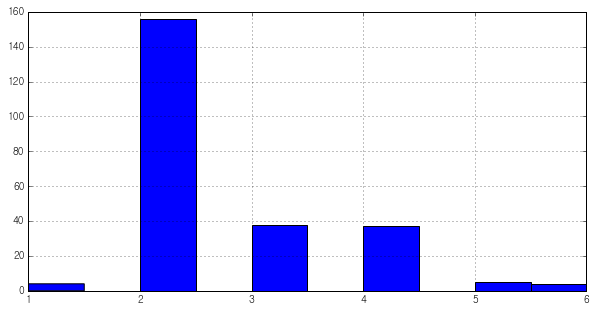

In [130]:
tips['Size'].hist()

In [131]:
plt.figure()

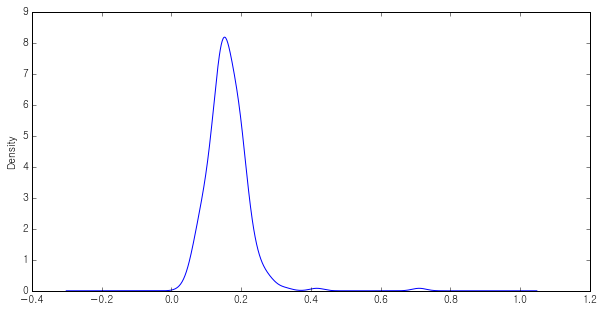

In [132]:
tips['tip_pct'].plot(kind='kde')

In [137]:
tips['total_pay'] = tips.total_bill + tips.tip
tips[:10]

,total_bill,tip,sex,smoker,day,time,Size,tip_pct,total_pay
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,28.20
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240,30.00
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050,10.77
7,26.88,3.12,Male,No,Sun,Dinner,4,0.116071,30.00
8,15.04,1.96,Male,No,Sun,Dinner,2,0.130319,17.00
9,14.78,3.23,Male,No,Sun,Dinner,2,0.218539,18.01


In [138]:
tips.where(tips.tip_pct > 0.2).dropna()

,total_bill,tip,sex,smoker,day,time,Size,tip_pct,total_pay
6,8.77,2.00,Male,No,Sun,Dinner,2.0,0.228050,10.77
9,14.78,3.23,Male,No,Sun,Dinner,2.0,0.218539,18.01
14,14.83,3.02,Female,No,Sun,Dinner,2.0,0.203641,17.85
17,16.29,3.71,Male,No,Sun,Dinner,3.0,0.227747,20.00
18,16.97,3.50,Female,No,Sun,Dinner,3.0,0.206246,20.47
20,17.92,4.08,Male,No,Sat,Dinner,2.0,0.227679,22.00
42,13.94,3.06,Male,No,Sun,Dinner,2.0,0.219512,17.00
46,22.23,5.00,Male,No,Sun,Dinner,2.0,0.224921,27.23
51,10.29,2.60,Female,No,Sun,Dinner,2.0,0.252672,12.89
63,18.29,3.76,Male,Yes,Sat,Dinner,4.0,0.205577,22.05


In [140]:
plt.figure()

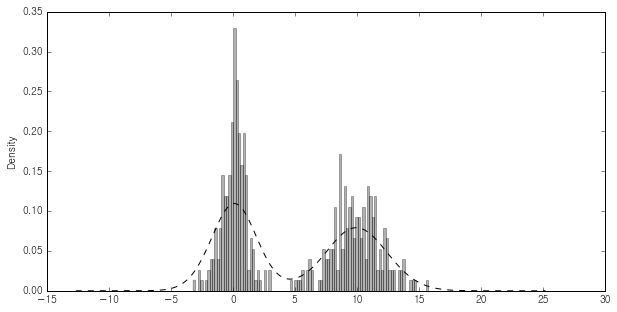

In [141]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

In [142]:
comp1[:10]

array([ 0.316 ,  1.2883, -0.652 ,  1.1016,  0.5639,  0.1986, -1.4846,
        0.3941,  0.288 , -0.5175])

In [145]:
comp2[:10]

array([  8.3261,  10.0393,  14.277 ,  13.4949,   9.5723,  10.3251,
         5.5682,   6.316 ,   9.7006,  12.5007])

In [146]:
values[:10]

0    0.315969
1    1.288301
2   -0.652043
3    1.101637
4    0.563863
5    0.198611
6   -1.484553
7    0.394140
8    0.287990
9   -0.517452
dtype: float64

### Scatter plots

In [147]:
macro = pd.read_csv('ch08/macrodata.csv')
macro[:10]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55
6,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.75,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.84,141.1,2.29,6.3,182.287,1.21,1.08
8,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.81,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.92,142.9,2.29,7.0,183.691,1.47,0.81


In [148]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data[:10]

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2
5,29.55,140.2,2.68,5.2
6,29.75,140.9,2.36,5.6
7,29.84,141.1,2.29,6.3
8,29.81,142.1,2.37,6.8
9,29.92,142.9,2.29,7.0


In [153]:
np.log(data)[:10]

,cpi,m1,tbilrate,unemp
0,3.366606,4.939497,1.036737,1.757858
1,3.372455,4.953712,1.124930,1.629241
2,3.379293,4.945207,1.340250,1.667707
3,3.379974,4.941642,1.465568,1.722767
4,3.385745,4.938781,1.252763,1.648659
5,3.386084,4.943070,0.985817,1.648659
6,3.392829,4.948050,0.858662,1.722767
7,3.395850,4.949469,0.828552,1.840550
8,3.394844,4.956531,0.862890,1.916923
9,3.398527,4.962145,0.828552,1.945910


In [152]:
trans_data = np.log(data).diff().dropna()
trans_data[:10]

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
6,0.006745,0.004980,-0.127155,0.074108
7,0.003021,0.001418,-0.030110,0.117783
8,-0.001006,0.007062,0.034338,0.076373
9,0.003683,0.005614,-0.034338,0.028988
10,0.002003,0.008362,0.013015,-0.028988


In [150]:
plt.figure()

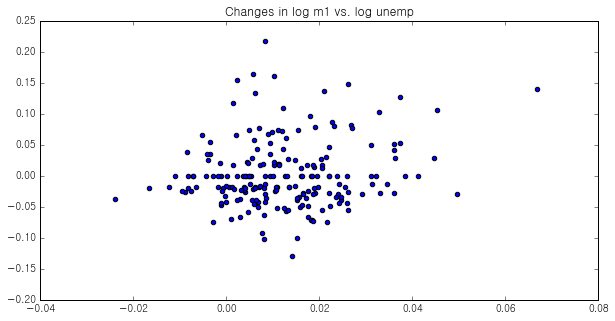

In [151]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129119be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x129b80dd8>]], dtype=object)

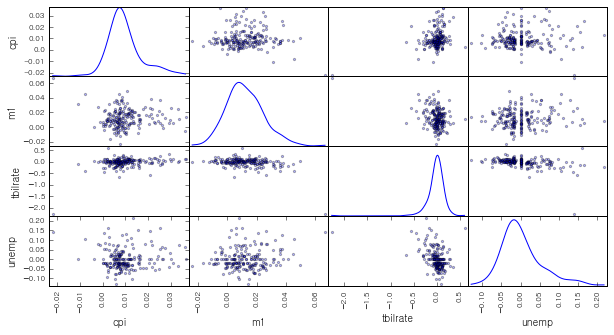

In [154]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## Plotting Maps: Visualizing Haiti Earthquake Crisis data

In [155]:
data = pd.read_csv('ch08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [157]:
data[:50]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [158]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [159]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [160]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [161]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

In [177]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010
10,15/03/2010 14:18,18.415000,-73.195000
11,19/03/2010 10:19,18.539513,-72.327118
12,22/03/2010 10:49,18.534260,-72.408960


In [165]:
data.CATEGORY[11]

'4. Menaces | Security Threats, 4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion, '

In [166]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [167]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [168]:
all_cats = get_all_categories(data.CATEGORY)
all_cats[:10]

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire',
 '2. Urgences logistiques | Vital Lines',
 "2a. Penurie d'aliments | Food Shortage",
 "2b. Penurie d'eau | Water shortage",
 '2c. Eau contaminee | Contaminated water',
 '2c. Probleme de securite | Security Concern']

In [169]:
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']

'Food Shortage'

In [170]:
english_mapping['6c']

'Earthquake and aftershocks'

In [171]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [173]:
all_codes[:5]

['1', '1a', '1b', '1c', '1d']

In [174]:
code_index[:5]

Index(['1', '1a', '1b', '1c', '1d'], dtype='object')

In [175]:
dummy_frame[:5]

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
dummy_frame.ix[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [182]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

dummy_frame[:10]

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
data['CATEGORY'][:10]

0           1. Urgences | Emergency, 3. Public Health, 
4                             1. Urgences | Emergency, 
5                        5e. Communication lines down, 
6     4. Menaces | Security Threats, 4e. Assainissem...
7                       4. Menaces | Security Threats, 
8     2. Urgences logistiques | Vital Lines, 2f. San...
9     2. Urgences logistiques | Vital Lines, 2d. Ref...
10    1a. Highly vulnerable, 2. Urgences logistiques...
11    4. Menaces | Security Threats, 4e. Assainissem...
12    2. Urgences logistiques | Vital Lines, 2d. Ref...
Name: CATEGORY, dtype: object

In [183]:
data = data.join(dummy_frame.add_prefix('category_'))

In [184]:
data[10:15]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
13,4033,Help needed in Brochette,17/03/2010 13:40,"Brochette 99, Brochette, west of Carrefour","We live in brochette 99, we don't find any hel...","2. Urgences logistiques | Vital Lines, 2b. Pen...",18.525190,-72.458954,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,4031,Victims of Sexual Assault in Champs-de-Mars Sh...,16/04/2010 14:45,provisional shleter on Champs-de-Mars,if women and children are victim of rape or ot...,"3. Public Health,",18.542300,-72.336200,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,4030,"Help needed in 1ere section, Leogane",26/04/2010 14:26,&quot;corail le maire&quot; in 1st section de...,"TO WHOM IT MAY CONCERN, PLEASE HELP US WE ARE ...","2. Urgences logistiques | Vital Lines,",18.499145,-72.651215,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,4029,Food /water and medicals supplies/ petit-goave,26/04/2010 12:37,petit goave,[13709949] · we are suffering in the area &quo...,"1. Urgences | Emergency, 7. Secours | Services...",18.426199,-72.818756,YES,NO,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,4027,Medical attention needed on Delmas 41,26/04/2010 16:12,Delmas 41,I am mikaelle I need to know where the hospita...,"3. Public Health, 3b. Chronic care needs,",18.547300,-72.301000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
data.ix[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 167.3 KB


In [189]:
from mpl_toolkits.basemap import Basemap
#from basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

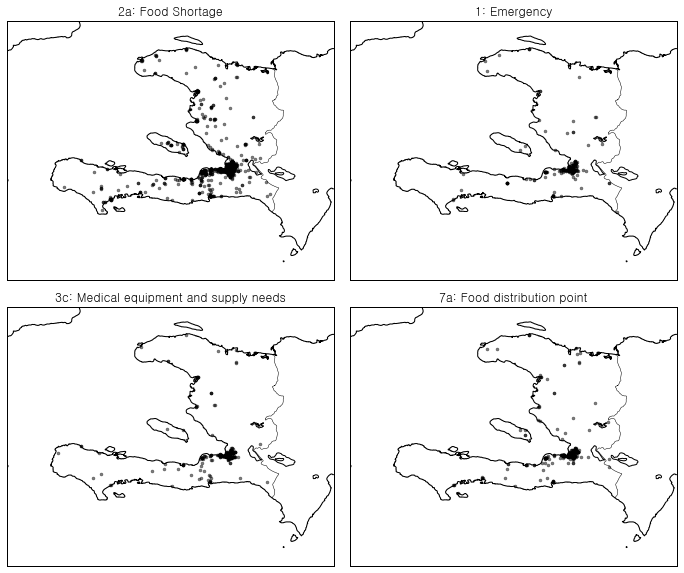

In [190]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

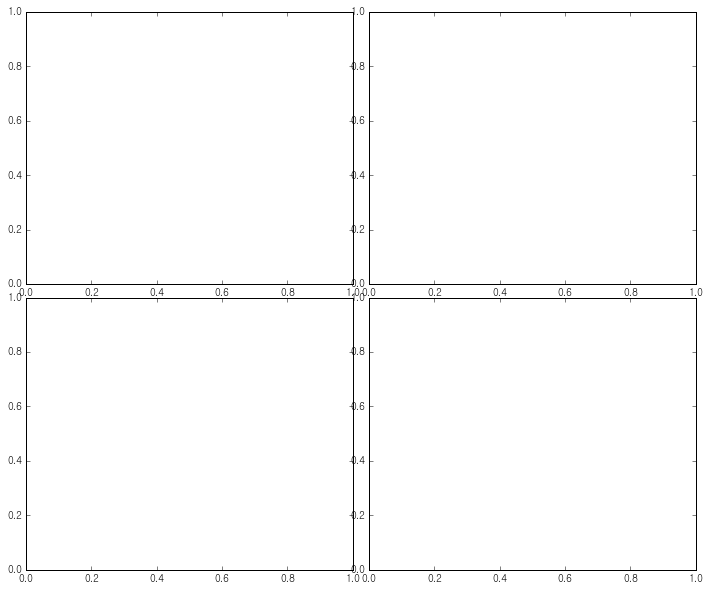

In [191]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        

In [192]:
make_plot()

In [193]:
shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

(1583,
 3,
 [-72.749246, 18.409952, 0.0, 0.0],
 [-71.973789, 18.7147105, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x12cd12e80>)